In [1]:
import numpy as np
import sqlite3 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

In [2]:
con = sqlite3.connect("rot_check_v4.1_1yrs.db")
data = pd.read_sql("select rotTelPos,filter,scheduler_note,night,fieldRA,fieldDec,rotSkyPos,observationStartMJD,rotSkyPos_desired,rotTelPos_backup from observations;", con)
con.close()

In [3]:
ack = data['rotTelPos'].values[1:] - data['rotTelPos'].values[0:-1]

In [4]:
sf = np.where( (data["filter"].values[1:] == data["filter"].values[0:-1]) &
              ((data["scheduler_note"].values[1:] == data["scheduler_note"].values[0:-1])) &
              (data["night"].values[1:] == data["night"].values[0:-1]))[0]

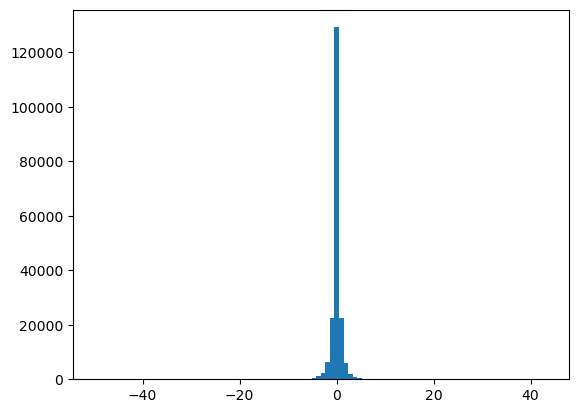

In [5]:
_temp = plt.hist(ack[sf], bins=100)

In [6]:
ack[sf].min()

-49.71225691851389

In [23]:
np.where(np.abs(ack[sf]) > 20.)[0].size

70

In [24]:
np.where(np.abs(ack[sf]) > 20.)[0]

array([  2628,  22807,  26866,  35575,  38432,  47437,  47438,  47524,
        47528,  47534,  51373,  54859,  54860,  54868,  54869,  67884,
        79618,  81321,  81483,  82026,  82075,  82349,  84362,  84794,
        84844,  85325,  85327,  93417,  93467, 101466, 101564, 101653,
       101656, 101661, 101662, 110422, 112277, 112280, 112284, 115463,
       115464, 127049, 127438, 127731, 129757, 132188, 132193, 135511,
       137500, 141322, 141449, 141451, 141454, 141740, 143489, 143603,
       144379, 144381, 151192, 152750, 157203, 159098, 159104, 162921,
       163785, 181198, 181248, 188098, 191287, 191288])

In [9]:
nights = data["night"].values[1:]
nights[sf[26866]]

59

In [10]:
in_night = np.where(data["night"] == 59)[0]

In [11]:
np.abs(np.diff(data["rotTelPos"].values[in_night])).max()

49.71225691851389

In [12]:
np.where(np.abs(np.diff(data["rotTelPos"].values[in_night])) > 30)

(array([718]),)

In [13]:
data.iloc[in_night[717]]

rotTelPos                  -34.748222
filter                              r
scheduler_note         pair_33, gr, b
night                              59
fieldRA                     321.51832
fieldDec                   -47.668414
rotSkyPos                  -63.788032
observationStartMJD      60855.311273
rotSkyPos_desired          -63.788032
rotTelPos_backup           -61.675188
Name: 27590, dtype: object

In [14]:
data.iloc[in_night[718]]

rotTelPos                   -27.80585
filter                              r
scheduler_note         pair_33, gr, b
night                              59
fieldRA                    314.132291
fieldDec                   -45.512106
rotSkyPos                  -47.205334
observationStartMJD      60855.311804
rotSkyPos_desired          -47.205334
rotTelPos_backup           -61.675188
Name: 27591, dtype: object

In [15]:
data.iloc[in_night[719]]

rotTelPos                  -77.518106
filter                              r
scheduler_note         pair_33, gr, b
night                              59
fieldRA                    296.216124
fieldDec                   -16.194502
rotSkyPos                  115.435442
observationStartMJD       60855.31342
rotSkyPos_desired          115.435442
rotTelPos_backup           -61.675188
Name: 27592, dtype: object

In [16]:
data.iloc[in_night[247]]

rotTelPos                   -58.94252
filter                              u
scheduler_note         pair_33, ur, a
night                              59
fieldRA                    252.073971
fieldDec                    -2.722254
rotSkyPos                  178.972717
observationStartMJD        60855.0772
rotSkyPos_desired          178.972717
rotTelPos_backup           -61.675188
Name: 27120, dtype: object

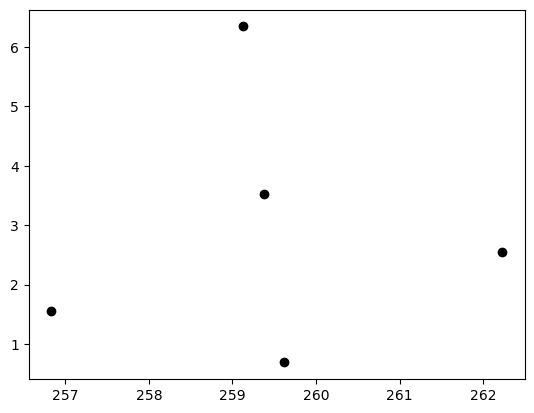

In [17]:
indx = in_night[np.arange(303,308,1)]
plt.plot(data["fieldRA"].values[indx], data["fieldDec"].values[indx], 'ko')

In [18]:
np.diff(data["observationStartMJD"].values[indx])*24*3600

array([38.59938264, 38.57349765, 38.56873694, 38.86543368])

In [19]:
data["rotSkyPos_desired"].values[indx]

array([-178.86738847, -175.27809399, -177.56232733, -174.11748865,
       -179.75610965])

In [20]:
data["rotSkyPos"].values[indx]

array([-178.86738847, -175.27809399, -177.56232733, -174.11748865,
       -179.75610965])

In [21]:
data["rotTelPos"].values[indx]

array([-71.99446293, -71.41481902, -71.19937787, -70.64803293,
       -71.01626423])

In [22]:
data["rotTelPos_backup"].values[indx]

array([-61.67518823, -61.67518823, -61.67518823, -61.67518823,
       -61.67518823])